In [91]:
%load_ext autoreload
%aimport -torch, pandas, hydra, numpy, pickle, os
# %aimport src, src.metrics
%autoreload 2
import pandas as pd
from hydra import initialize, compose
import pathlib
import datetime
import numpy as np

from src.utils.constants import DEFAULT_USER_COL,DEFAULT_ITEM_COL,DEFAULT_RATING_COL, DEFAULT_TIMESTAMP_COL
from src.data_process import data_split, neg_sample

with initialize(version_base=None, config_path="../src/conf"):
    cfg = compose(config_name="config", overrides=[])

In [2]:
df_all_f = pd.read_csv(pathlib.Path(cfg.path.root, cfg.file.all_features))

In [3]:
df_all_f.columns

Index(['userid', 'timestamp', 'itemid', 'WindowID_user', 'Split', 'City',
       'State', 'Country', 'Zip_user', 'DegreeType', 'Major', 'GraduationDate',
       'WorkHistoryCount', 'TotalYearsExperience', 'CurrentlyEmployed',
       'ManagedOthers', 'ManagedHowMany', 'WindowID_job', 'City_job',
       'State_job', 'Country_job', 'Zip_job', 'StartDate', 'EndDate',
       'rating'],
      dtype='object')

In [4]:
df_all_f.shape

(1594565, 25)

In [5]:
series_datetime =pd.to_datetime(df_all_f.timestamp).dt.date

In [54]:
global_cut = pd.to_datetime('2012-05-30')

In [55]:
train_date = series_datetime[series_datetime< global_cut]

In [56]:
test_date = series_datetime[series_datetime>= global_cut]

In [70]:
len(test_date)/len(series_datetime)

0.2484978661892115

<AxesSubplot:>

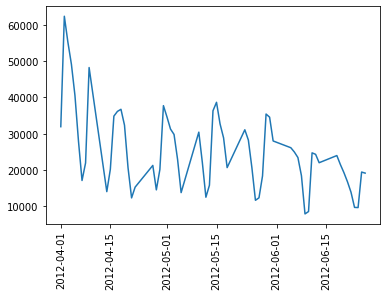

In [58]:
series_datetime.value_counts().plot(rot=90)

## The average interactive 

In [60]:
df_train = df_all_f[series_datetime< global_cut]

In [61]:
df_test = df_all_f[series_datetime>= global_cut]

In [62]:
train_userid = set(df_train['userid'])

In [63]:
test_userid = set(df_test['userid'])

In [64]:
intersection = train_userid.intersection(test_userid)

In [81]:
df_train_sub = df_train[df_train.userid.isin(intersection)].reset_index()
df_test_sub = df_test[df_test.userid.isin(intersection)].reset_index()

In [86]:
df_train_sub.to_feather(pathlib.Path(cfg.path.global_temp, cfg.global_temp_data.train_pos))
df_test_sub.to_feather(pathlib.Path(cfg.path.global_temp, cfg.global_temp_data.test_pos))


## Negative samples 

In [95]:
path_read_all = pathlib.Path(cfg.path.root, cfg.file.all_features)
path_read_train = pathlib.Path(cfg.path.global_temp, cfg.global_temp_data.train_pos)
path_save = pathlib.Path(cfg.path.global_temp, cfg.global_temp_data.train_neg)

In [96]:
ng_num = cfg.params.neg_train
neg_sample.main(path_read_all = path_read_all,
                path_read_goal = path_read_train, 
                path_save=path_save, ng_num=ng_num, 
                path_read_neg=None, test=False, )

100%|██████████| 29393/29393 [16:30<00:00, 29.68it/s]


In [97]:
path_read_all = pathlib.Path(cfg.path.root, cfg.file.all_features)
path_read_test = pathlib.Path(cfg.path.global_temp, cfg.global_temp_data.test_pos)
path_save = pathlib.Path(cfg.path.global_temp, cfg.global_temp_data.test_neg)
path_train_neg = pathlib.Path(cfg.path.global_temp, cfg.global_temp_data.train_neg)

In [98]:
ng_num = cfg.params.neg_test
neg_sample.main(path_read_all=path_read_all, 
                path_read_goal=path_read_test, 
                path_save=path_save, 
                ng_num=ng_num, 
                test=True,
                path_read_neg = path_train_neg)

100%|██████████| 29393/29393 [45:41<00:00, 10.72it/s]     
